## UT Analysis

In [ ]:
# ----------------- Imports -----------------
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# ----------------- Configuration -----------------
CSV_FOLDER = '.'  # folder with your CSV files
MAX_SAMPLES = 50  # should match Arduino MAX_SAMPLES

# ----------------- Load all CSV files -----------------
csv_files = sorted(glob.glob(os.path.join(CSV_FOLDER, 'scan_*.csv')))
all_scans = []

for file in csv_files:
    df = pd.read_csv(file)
    df['ScanFile'] = os.path.basename(file)  # keep track of file
    all_scans.append(df)

# Concatenate all scans into one DataFrame
data = pd.concat(all_scans, ignore_index=True)

# ----------------- Organize data -----------------
# Example: get average thickness per scan
thickness_per_scan = data.groupby('ScanFile')['Thickness_mm'].mean()

# ----------------- Plotting -----------------
plt.figure(figsize=(15, 8))

# 1. Plot Raw, Ref, Corrected
for scan_file, df in data.groupby('ScanFile'):
    x = df['Idx']
    plt.plot(x, df['Raw'], label=f'Raw ({scan_file})', alpha=0.3)
    plt.plot(x, df['Ref'], label=f'Ref ({scan_file})', alpha=0.3)
    plt.plot(x, df['Corrected'], label=f'Corrected ({scan_file})', alpha=0.5)

plt.xlabel('Sample Index')
plt.ylabel('ADC Value')
plt.title('Ultrasound Scan Data')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.show()

# 2. Plot Thickness over scans
plt.figure(figsize=(12, 6))
thickness_per_scan.plot(kind='bar')
plt.ylabel('Average Thickness (mm)')
plt.title('Average Thickness per Scan File')
plt.grid(axis='y')
plt.show()

# 3. Optional: plot echo index per scan
plt.figure(figsize=(12, 6))
echo_index_per_scan = data.groupby('ScanFile')['EchoIdx'].first()
echo_index_per_scan.plot(marker='o')
plt.ylabel('Echo Sample Index')
plt.title('Echo Index per Scan File')
plt.grid(True)
plt.show()


# plot just one file

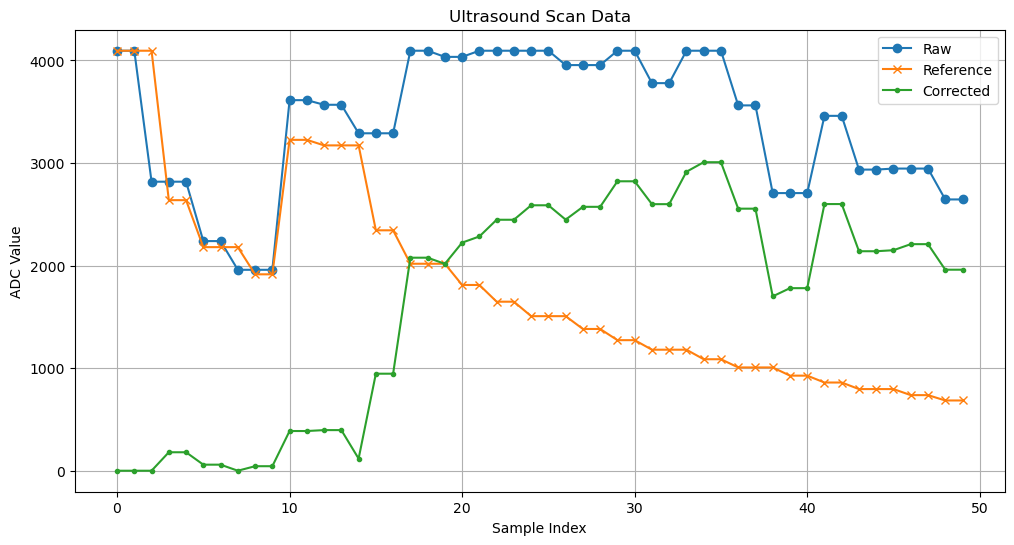

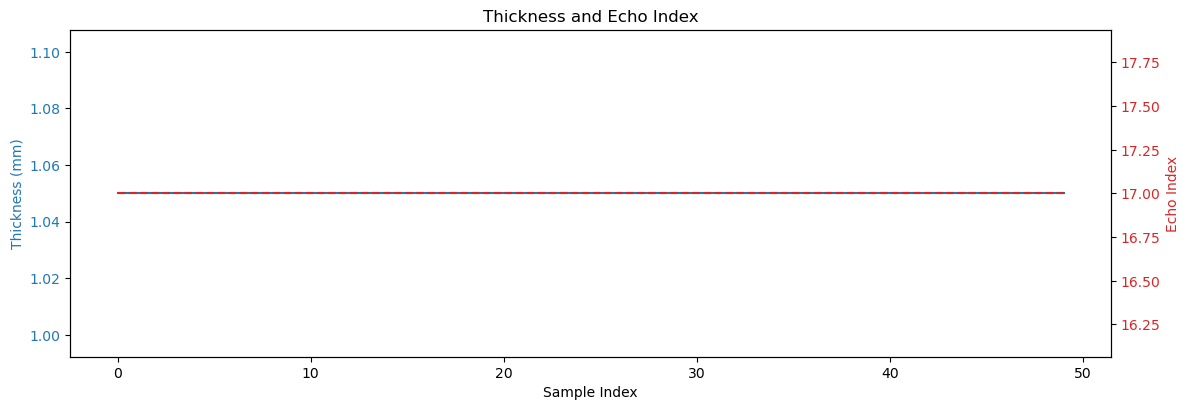

In [ ]:
# ----------------- Imports -----------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ----------------- CONFIG -----------------
CSV_FILE = "scan_20250826_163413_25.csv'  # replace with CSV file path

# ----------------- Load CSV -----------------
df = pd.read_csv(CSV_FILE)

# ----------------- Compute first difference of Corrected -----------------
df['Corrected_diff'] = df['Corrected'].diff().fillna(0)  # first difference

# ----------------- Plot Raw, Reference, Corrected -----------------
plt.figure(figsize=(12, 6))
plt.plot(df['Idx'], df['Raw'], label='Raw', marker='o')
plt.plot(df['Idx'], df['Ref'], label='Reference', marker='x')
plt.plot(df['Idx'], df['Corrected'], label='Corrected', marker='.')
plt.xlabel('Sample Index')
plt.ylabel('ADC Value')
plt.title('Ultrasound Scan Data')
plt.grid(True)
plt.legend()
plt.show()

# ----------------- Plot Corrected first difference -----------------
plt.figure(figsize=(12, 4))
plt.plot(df['Idx'], df['Corrected_diff'], color='purple', label='Corrected First Difference', marker='.')
plt.xlabel('Sample Index')
plt.ylabel('Delta Corrected')
plt.title('First Difference of Corrected Values')
plt.grid(True)
plt.legend()
plt.show()

# ----------------- Plot Thickness and Echo Index -----------------
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df['Idx'], df['Thickness_mm'], color='tab:blue', label='Thickness (mm)')
ax1.set_xlabel('Sample Index')
ax1.set_ylabel('Thickness (mm)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(df['Idx'], df['EchoIdx'], color='tab:red', label='Echo Index', linestyle='--')
ax2.set_ylabel('Echo Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Thickness and Echo Index')
plt.show()
